<a href="https://colab.research.google.com/github/estrickler1/Big-Data-OSU-REU/blob/main/OSU_REU_ML_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pa
from sklearn.metrics import r2_score
from sklearn import linear_model
url = 'https://raw.githubusercontent.com/estrickler1/Big-Data-OSU-REU/main/dat_REU.csv'
data = pa.read_csv(url)

Randomizer

In [7]:
data = data.sample(n=len(data))                 #Randomizer
data.columns = np.arange(len(data.columns))     #Labels Columns
data = data.reset_index(drop=True)              #Reindexer
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.66874,0.483870,0.98044,-0.52575,-0.76713,-0.51585,-0.27411,-0.75482,-0.77326,-0.56282,-0.045342,-0.18039,-0.67612,-0.76592,-0.64619,1
1,-0.68659,0.809830,0.88043,-0.52337,-0.78901,-0.58558,-0.42095,-0.81749,-0.77790,-0.62713,-0.315110,-0.18983,-0.73599,-0.73599,-0.70606,1
2,-0.60859,0.152880,0.60265,-0.49248,-0.73731,-0.41459,-0.20793,-0.82668,-0.62565,-0.39239,-0.131790,-0.31968,-0.64619,-0.70606,-0.49654,2
3,-0.69029,0.412280,0.91714,-0.52154,-0.76969,-0.49108,-0.34067,-0.81342,-0.78071,-0.68450,-0.197540,-0.18053,-0.73599,-0.73599,-0.67612,1
4,-0.69234,0.827040,0.87415,-0.49753,-0.77148,-0.49678,-0.32927,-0.77494,-0.73849,-0.55536,-0.210940,-0.18323,-0.70606,-0.76592,-0.67612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.54289,0.073300,0.84301,-0.43805,-0.76507,-0.38504,-0.22736,-0.85470,-0.64883,-0.52474,-0.134790,-0.34755,-0.61626,-0.67612,-0.49654,2
9995,-0.56558,0.045507,0.72798,-0.49401,-0.74563,-0.48250,-0.21583,-0.86715,-0.66180,-0.49866,-0.131430,-0.38083,-0.58633,-0.70606,-0.49654,2
9996,-0.63385,0.233040,0.46357,-0.44751,-0.74704,-0.41119,-0.21989,-0.79241,-0.65087,-0.39994,-0.134750,-0.36936,-0.61626,-0.70606,-0.55640,2
9997,-0.67744,0.680120,0.88367,-0.52141,-0.76611,-0.63591,-0.38924,-0.79721,-0.78201,-0.64677,-0.169010,-0.20303,-0.70606,-0.73599,-0.70606,1


Divides dataset into training and testing

In [8]:
col=(len(data.transpose())) - 1
dataFeaturesTrain = data.iloc[:8000,0:col]
dataFeaturesTest = data.iloc[8000:,0:col]
dataFeaturesTest = dataFeaturesTest.reset_index(drop=True)
dataAnswerTrain = data.iloc[:8000,col]
dataAnswerTest = data.iloc[8000:,col]
dataAnswerTest = dataAnswerTest.reset_index(drop=True)

Trains the model

In [9]:
regr = linear_model.LinearRegression()
regr.fit(dataFeaturesTrain, dataAnswerTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Tests the model and determinds accuracy

In [10]:
right = 0
wrong = 0
accuracy = 0
num = 0
prediction = regr.predict(dataFeaturesTest)
for i in range(len(prediction)):
    num = (np.round(prediction[i]))
    if num == dataAnswerTest[i]:
      right = right + 1
    else:
      wrong = wrong + 1
accuracy = right / (len(prediction))
print (accuracy)

1.0


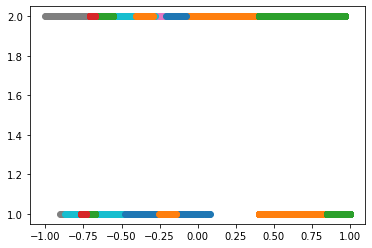

In [11]:
for i in range(col-1):
  plt.scatter(data.iloc[:,i],data.iloc[:,col])

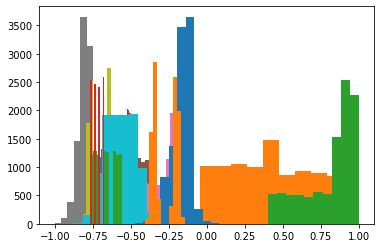

In [12]:
for i in range(col-1):
  plt.hist(data.iloc[:,i])

Finds the average for every entire row, apart from last column.

In [13]:
avgNum = []
sum = 0
for j in range(len(data)):
  for i in range(col-1):
      if i == 0:
        sum = data.iloc[j,i]
      elif i == col:
        sum = (sum + data.iloc[j,i]) / len(col)
      else:
        sum = sum + data.iloc[j,i]
  avgNum.append(sum)

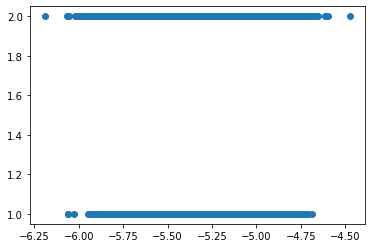

In [14]:
plt.scatter(avgNum,data.iloc[:,col])